In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion

In [ ]:
df = pd.read_csv('Labelled_Data.csv')
df

,Unnamed: 0,Data,Label
0,1,$candidates.candidateId,NaN
1,2,$candidates.workspace,JP
2,3,$candidates.teaId,NaN
3,4,$candidates.title,NaN
4,5,$candidates.firstName,FINA
...,...,...,...
18387,18388,$paymentMethods.check.zip,PC
18388,18389,$paymentMethods.check.countryId,CC
18389,18390,$hp,NaN
18390,18391,$subDistrict,CITY


In [ ]:
#Check for null values in the dataset
df.isnull().sum()

Unnamed: 0        0
Data              2
Label         15745
dtype: int64

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df = df[df['Data'].notna()]
df

,Unnamed: 0,Data,Label
0,1,$candidates.candidateId,NaN
1,2,$candidates.workspace,JP
2,3,$candidates.teaId,NaN
3,4,$candidates.title,NaN
4,5,$candidates.firstName,FINA
...,...,...,...
18387,18388,$paymentMethods.check.zip,PC
18388,18389,$paymentMethods.check.countryId,CC
18389,18390,$hp,NaN
18390,18391,$subDistrict,CITY


In [ ]:
#Splitting the word with the upper case

newCol=[]
for i in df["Data"]:
    temp=i
    n=len(temp)
    j=0
    while j<n:
        if ord(temp[j])<=90 and ord(temp[j])>=65:
            temp=temp[:j]+" "+temp[j:]
            n+=1
            j+=1
        j+=1
    newCol.append(temp)

In [ ]:
#Camel case separated dataframe can be given as
df["Separated"]=newCol

In [ ]:
df

,Unnamed: 0,Data,Label,Separated
0,1,$candidates.candidateId,NaN,$candidates.candidate Id
1,2,$candidates.workspace,JP,$candidates.workspace
2,3,$candidates.teaId,NaN,$candidates.tea Id
3,4,$candidates.title,NaN,$candidates.title
4,5,$candidates.firstName,FINA,$candidates.first Name
...,...,...,...,...
18387,18388,$paymentMethods.check.zip,PC,$payment Methods.check.zip
18388,18389,$paymentMethods.check.countryId,CC,$payment Methods.check.country Id
18389,18390,$hp,NaN,$hp
18390,18391,$subDistrict,CITY,$sub District


In [ ]:
###Text Preprocessing

#Convert the data type of the column to string
df["Separated"]=df["Separated"].astype('string')

#Replace $ with blank
df["Separated"]=df["Separated"].str.replace("$","")

#Replace the space with .
df["Separated"]=df["Separated"].str.replace(" ",".")

#Convert the whole text into lower case
df['Separated']=df['Separated'].str.lower()

#Split the data into different words
df["Text_Split"]= df["Separated"].str.split(".")

#Label the classes to 0 and 1

df['Label'] = df['Label'].fillna(0)
df.loc[df['Label'] != 0, 'Label'] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  import sys


In [ ]:
df

,Unnamed: 0,Data,Label,Separated,Text_Split
0,1,$candidates.candidateId,0,candidates.candidate.id,"[candidates, candidate, id]"
1,2,$candidates.workspace,1,candidates.workspace,"[candidates, workspace]"
2,3,$candidates.teaId,0,candidates.tea.id,"[candidates, tea, id]"
3,4,$candidates.title,0,candidates.title,"[candidates, title]"
4,5,$candidates.firstName,1,candidates.first.name,"[candidates, first, name]"
...,...,...,...,...,...
18387,18388,$paymentMethods.check.zip,1,payment.methods.check.zip,"[payment, methods, check, zip]"
18388,18389,$paymentMethods.check.countryId,1,payment.methods.check.country.id,"[payment, methods, check, country, id]"
18389,18390,$hp,0,hp,[hp]
18390,18391,$subDistrict,1,sub.district,"[sub, district]"


In [ ]:
df['Text_Split']=df['Text_Split'].astype('string')

In [ ]:
df.iloc[:,4]=df.iloc[:,4].str.replace("[","")
df.iloc[:,4]=df.iloc[:,4].str.replace("]","")
df.iloc[:,4]=df.iloc[:,4].str.replace(",","")
df.iloc[:,4]=df.iloc[:,4].str.replace("'","")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [ ]:
df

,Unnamed: 0,Data,Label,Separated,Text_Split
0,1,$candidates.candidateId,0,candidates.candidate.id,candidates candidate id
1,2,$candidates.workspace,1,candidates.workspace,candidates workspace
2,3,$candidates.teaId,0,candidates.tea.id,candidates tea id
3,4,$candidates.title,0,candidates.title,candidates title
4,5,$candidates.firstName,1,candidates.first.name,candidates first name
...,...,...,...,...,...
18387,18388,$paymentMethods.check.zip,1,payment.methods.check.zip,payment methods check zip
18388,18389,$paymentMethods.check.countryId,1,payment.methods.check.country.id,payment methods check country id
18389,18390,$hp,0,hp,hp
18390,18391,$subDistrict,1,sub.district,sub district


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


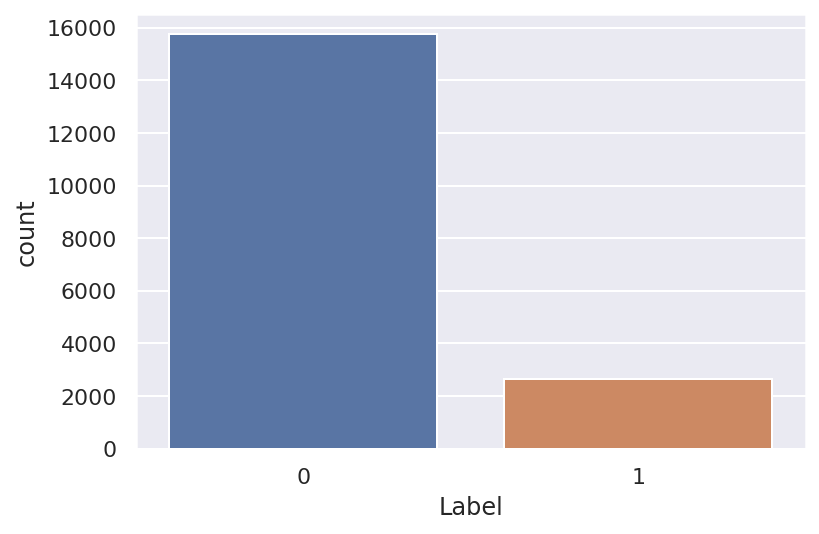

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.countplot(df.Label)
plt.show()

In [ ]:
df['word_length'] = df['Text_Split'].apply(lambda x:len(x.split()))

In [ ]:
df

,Unnamed: 0,Data,Label,Separated,Text_Split,word_length
0,1,$candidates.candidateId,0,candidates.candidate.id,candidates candidate id,3
1,2,$candidates.workspace,1,candidates.workspace,candidates workspace,2
2,3,$candidates.teaId,0,candidates.tea.id,candidates tea id,3
3,4,$candidates.title,0,candidates.title,candidates title,2
4,5,$candidates.firstName,1,candidates.first.name,candidates first name,3
...,...,...,...,...,...,...
18387,18388,$paymentMethods.check.zip,1,payment.methods.check.zip,payment methods check zip,4
18388,18389,$paymentMethods.check.countryId,1,payment.methods.check.country.id,payment methods check country id,5
18389,18390,$hp,0,hp,hp,1
18390,18391,$subDistrict,1,sub.district,sub district,2


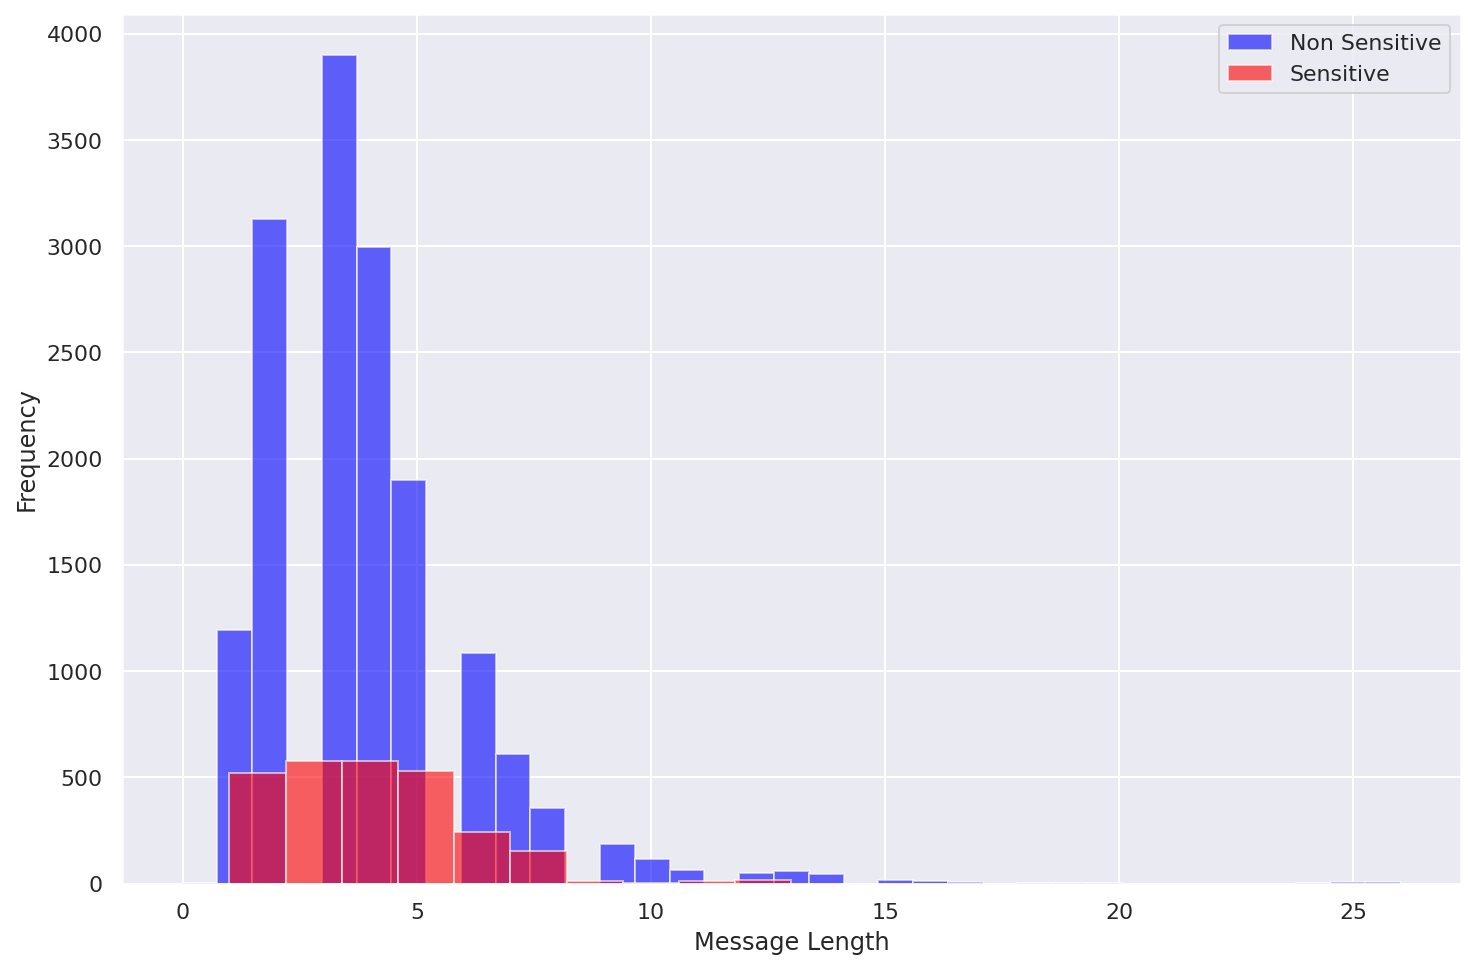

In [ ]:
plt.figure(figsize=(12, 8))

df[df.Label==0].word_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Non Sensitive', alpha=0.6)
df[df.Label == 1].word_length.plot(kind='hist', color='red', 
                                       label='Sensitive', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")
plt.show()

In [ ]:
df.groupby('Label').mean()

,Unnamed: 0,word_length
Label,,
0,9260.876326,3.868513
1,8819.009067,4.035890


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk

### Calculating the word frequency by using nltk
words_list = []
for sentence in df.Text_Split:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)
#freq_dist.keys()

[('data', 3306),
 ('id', 1701),
 ('payload', 1416),
 ('value', 1258),
 ('items', 1238),
 ('name', 1036),
 ('contact', 937),
 ('type', 847),
 ('date', 758),
 ('address', 727),
 ('account', 676),
 ('results', 661),
 ('code', 564),
 ('contracts', 515),
 ('list', 466),
 ('sdks', 444),
 ('details', 426),
 ('status', 389),
 ('crs_establishment', 360),
 ('addresses', 351)]

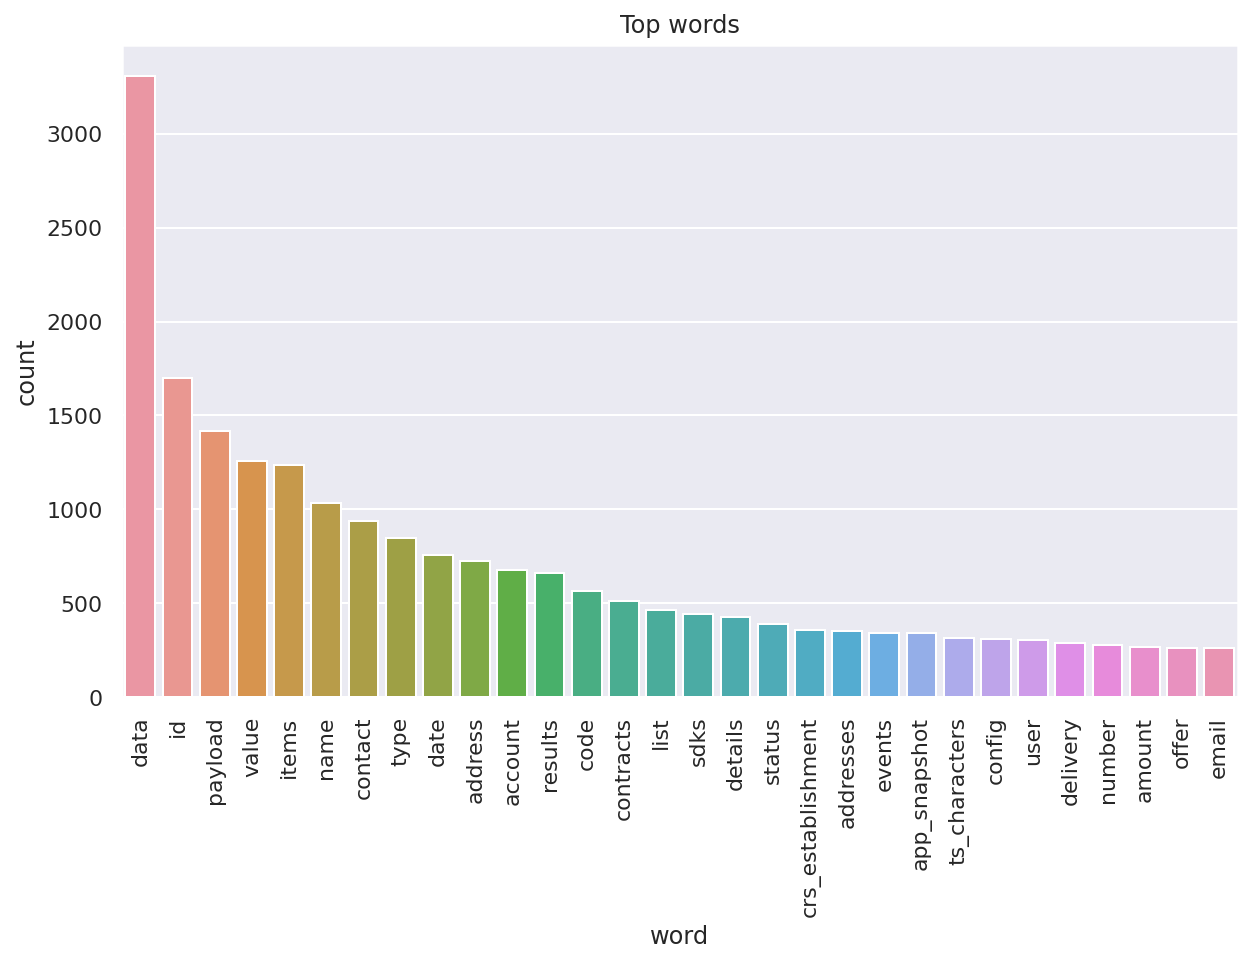

In [ ]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

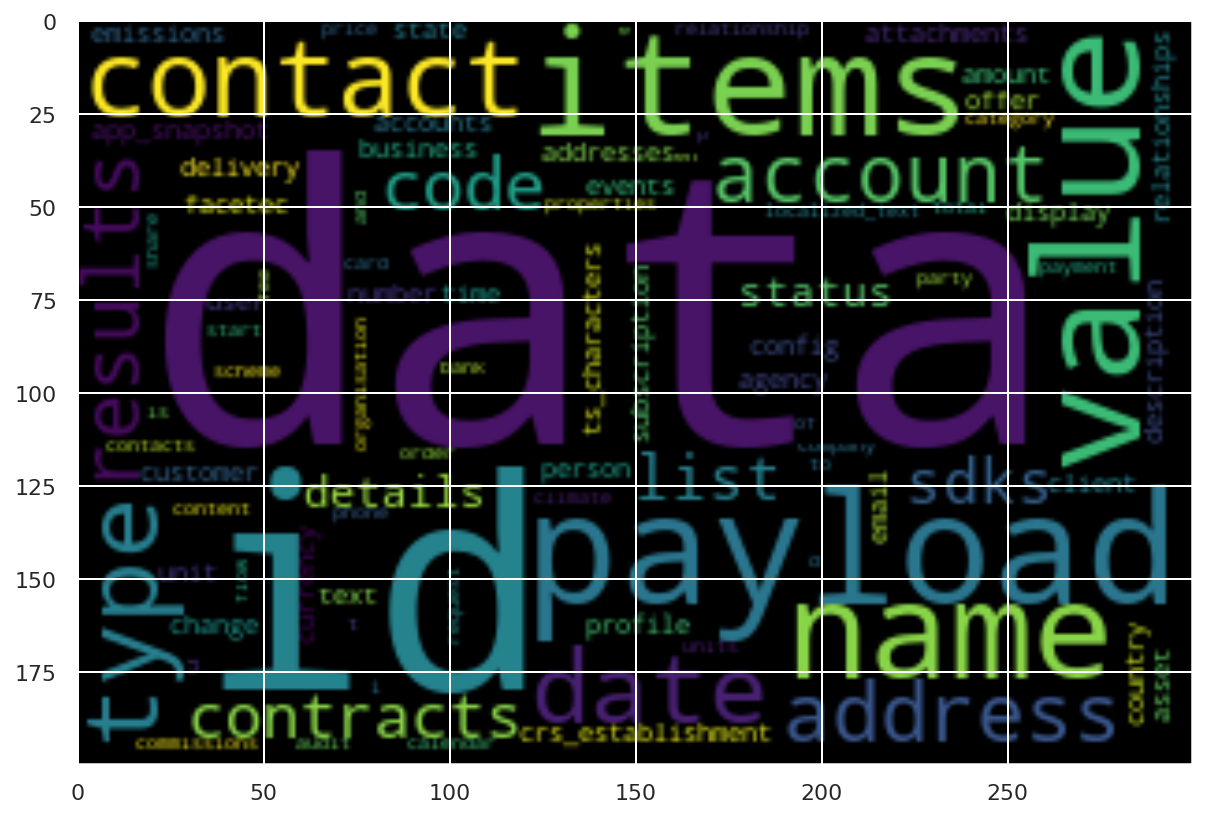

In [ ]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

In [ ]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(df.Text_Split, df.Label, test_size = 0.2, stratify = df.Label
                                                 ,random_state = 42)

In [ ]:
X_train

15595                                   awards sequence no
9533                                     agency trace_code
18066                                            order qty
10094                                 agency_types_allowed
15031             payments payment method account nickname
                               ...                        
13192                                  users is_restricted
15702                                       rules use paay
14423    template select criteria intake user intake ac...
17967                                   value inventory_id
7410     country breakdown holdings country breakdown h...
Name: Text_Split, Length: 14712, dtype: string

In [ ]:
from keras.preprocessing.text import Tokenizer
num_words = 10000 # this means 15000 unique words can be taken 
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([X_train, X_test], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
print(tokenizer.fit_on_texts(df_total))

None


In [ ]:
len(tokenizer.word_index)

3548

In [ ]:
df.word_length.max()

26

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_train_ =tokenizer.texts_to_sequences(X_train)
X_train_pad=pad_sequences(X_train_,maxlen=171,padding='post')
X_test_ = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_, maxlen = 171, padding = 'post')

In [ ]:
print(X_train_pad.shape,X_test_pad.shape)

(14712, 171) (3678, 171)


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM, Embedding,Bidirectional
import tensorflow
from tensorflow.compat.v1.keras.layers import CuDNNLSTM,CuDNNGRU
from tensorflow.keras.layers import Dropout

In [ ]:
X_train_pad
X_train_pad=np.array(X_train_pad,dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
X_test_pad=np.array(X_test_pad,dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
y_train=np.array(y_train,dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
y_train

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
y_test=np.array(y_test,dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
X_train_pad.shape

(14712, 171)

In [ ]:
X_test_pad
X_test_pad=np.array(X_test_pad, dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [ ]:
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model = Sequential()
model.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1] # max_len of text sequence
                          ))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 171, 100)          1000000   
                                                                 
 dropout (Dropout)           (None, 171, 100)          0         
                                                                 
 bidirectional (Bidirectiona  (None, 171, 200)         161600    
 l)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 171, 200)          0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 171, 400)         643200    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 171, 400)          0

In [ ]:
#EarlyStopping and ModelCheckpoint

from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)
mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
history_embedding = model.fit(X_train_pad,y_train, epochs = 35, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )

Epoch 1/35
123/123 [==============================] - ETA: 0s - loss: 0.2524 - accuracy: 0.9113
Epoch 1: val_accuracy improved from -inf to 0.96438, saving model to ./model.h5
123/123 [==============================] - 26s 123ms/step - loss: 0.2524 - accuracy: 0.9113 - val_loss: 0.1027 - val_accuracy: 0.9644
Epoch 2/35
123/123 [==============================] - ETA: 0s - loss: 0.0872 - accuracy: 0.9708
Epoch 2: val_accuracy improved from 0.96438 to 0.97064, saving model to ./model.h5
123/123 [==============================] - 14s 116ms/step - loss: 0.0872 - accuracy: 0.9708 - val_loss: 0.0876 - val_accuracy: 0.9706
Epoch 3/35
123/123 [==============================] - ETA: 0s - loss: 0.0640 - accuracy: 0.9783
Epoch 3: val_accuracy did not improve from 0.97064
123/123 [==============================] - 14s 117ms/step - loss: 0.0640 - accuracy: 0.9783 - val_loss: 0.0925 - val_accuracy: 0.9701
Epoch 4/35
123/123 [==============================] - ETA: 0s - loss: 0.0543 - accuracy: 0.9814


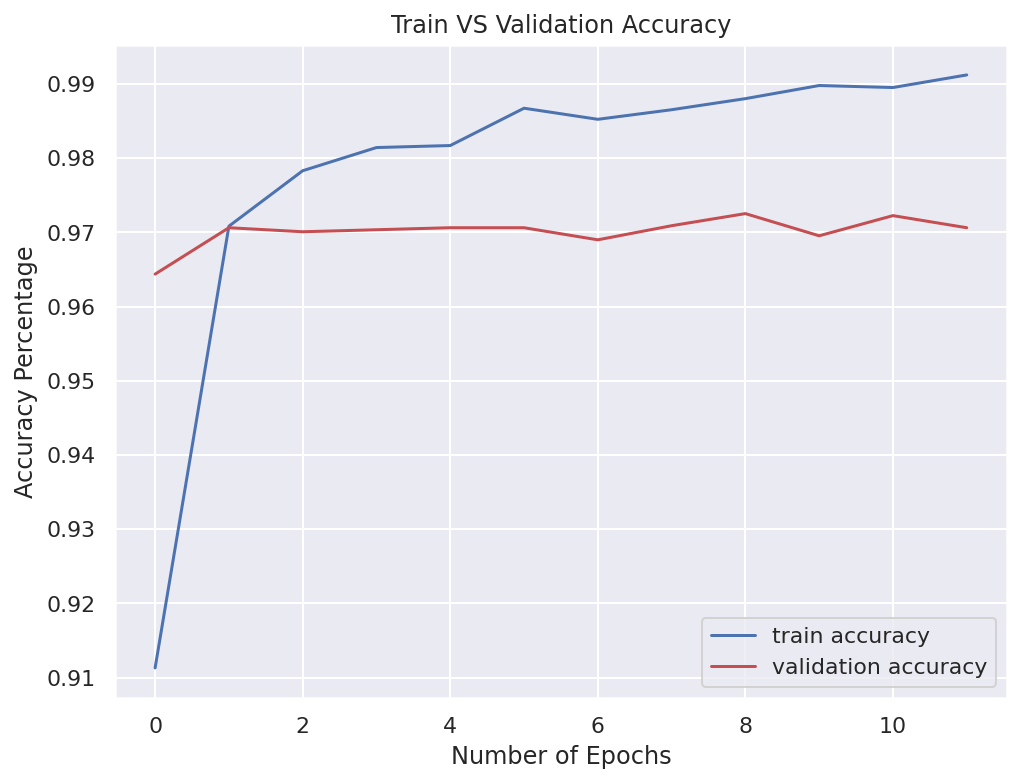

In [ ]:
# lets draw learning curve 
plt.figure(figsize=[8,6])
plt.plot(history_embedding.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_embedding.history['val_accuracy'],c='r',label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Percentage')
plt.title('Train VS Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

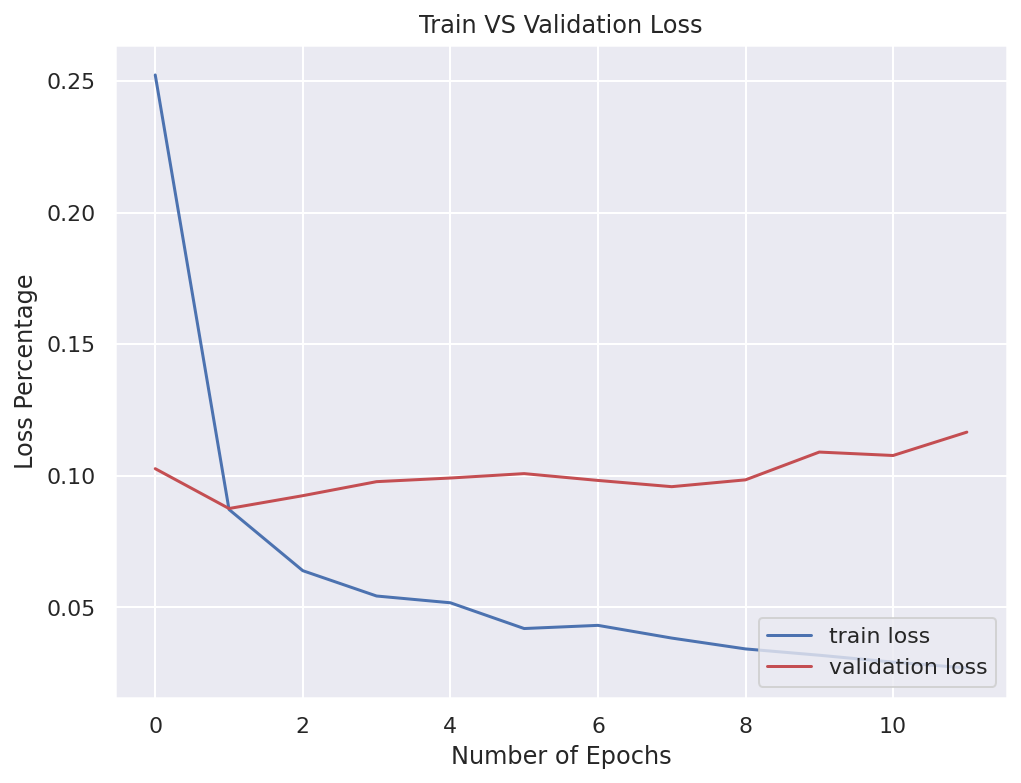

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history_embedding.history['loss'],c='b',label='train loss')
plt.plot(history_embedding.history['val_loss'],c='r',label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Percentage')
plt.title('Train VS Validation Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import gensim.downloader as api
glove_gensim  = api.load('glove-wiki-gigaword-100') # this would download vector with 100 dimension

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
glove_gensim['cat'].shape[0]

100

In [ ]:
vector_size = 100
gensim_weight_matrix = np.zeros((num_words ,vector_size))
gensim_weight_matrix.shape

for word, index in tokenizer.word_index.items():
    if index < num_words: # since index starts with zero 
        if word in glove_gensim.wv.vocab:
            gensim_weight_matrix[index] = glove_gensim[word]
        else:
            gensim_weight_matrix[index] = np.zeros(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  import sys


In [ ]:
gensim_weight_matrix.shape

(10000, 100)

In [ ]:
# designing our architecture 
EMBEDDING_DIM = 100 # this means the embedding layer will create  a vector in 100 dimension
model_gensim = Sequential()
model_gensim.add(Embedding(input_dim = num_words,# the whole vocabulary size 
                          output_dim = EMBEDDING_DIM, # vector space dimension
                          input_length= X_train_pad.shape[1], # max_len of text sequence
                          weights = [gensim_weight_matrix],trainable = False))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(200,return_sequences=True)))
model_gensim.add(Dropout(0.2))
model_gensim.add(Bidirectional(CuDNNLSTM(100,return_sequences=False)))
model_gensim.add(Dense(1, activation = 'sigmoid'))
model_gensim.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = 'accuracy')

In [ ]:
model_gensim.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 171, 100)          1000000   
                                                                 
 dropout_3 (Dropout)         (None, 171, 100)          0         
                                                                 
 bidirectional_3 (Bidirectio  (None, 171, 200)         161600    
 nal)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 171, 200)          0         
                                                                 
 bidirectional_4 (Bidirectio  (None, 171, 400)         643200    
 nal)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 171, 400)         

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model_gensim.h5', monitor = 'val_accuracy', mode = 'max', verbose = 1, save_best_only = True)

In [ ]:
history_gensim = model_gensim.fit(X_train_pad,y_train, epochs = 25, batch_size = 120, validation_data=(X_test_pad, y_test),verbose = 1, callbacks= [es, mc]  )

Epoch 1/25
123/123 [==============================] - ETA: 0s - loss: 0.2502 - accuracy: 0.9047
Epoch 1: val_accuracy improved from -inf to 0.93230, saving model to ./model_gensim.h5
123/123 [==============================] - 18s 123ms/step - loss: 0.2502 - accuracy: 0.9047 - val_loss: 0.1851 - val_accuracy: 0.9323
Epoch 2/25
123/123 [==============================] - ETA: 0s - loss: 0.1721 - accuracy: 0.9352
Epoch 2: val_accuracy improved from 0.93230 to 0.94671, saving model to ./model_gensim.h5
123/123 [==============================] - 15s 126ms/step - loss: 0.1721 - accuracy: 0.9352 - val_loss: 0.1459 - val_accuracy: 0.9467
Epoch 3/25
123/123 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9473
Epoch 3: val_accuracy improved from 0.94671 to 0.95677, saving model to ./model_gensim.h5
123/123 [==============================] - 14s 117ms/step - loss: 0.1471 - accuracy: 0.9473 - val_loss: 0.1172 - val_accuracy: 0.9568
Epoch 4/25
123/123 [=======================

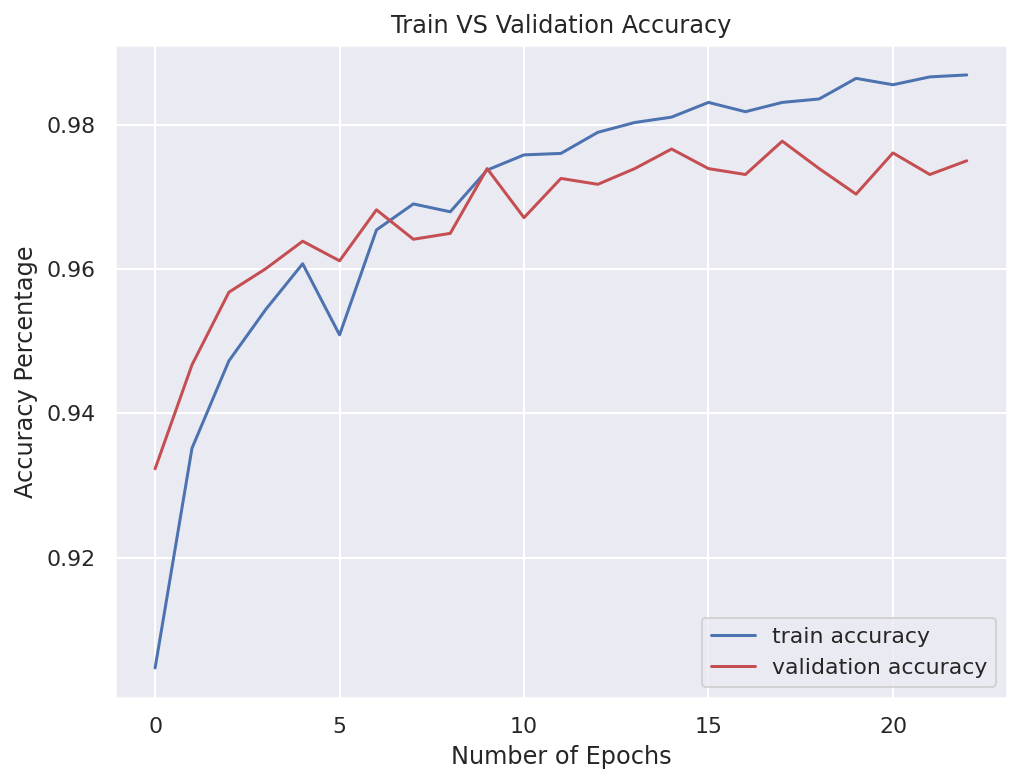

In [ ]:
# lets draw learning curve 
plt.figure(figsize=[8,6])
plt.plot(history_gensim.history['accuracy'],c='b',label='train accuracy')
plt.plot(history_gensim.history['val_accuracy'],c='r',label='validation accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Percentage')
plt.title('Train VS Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

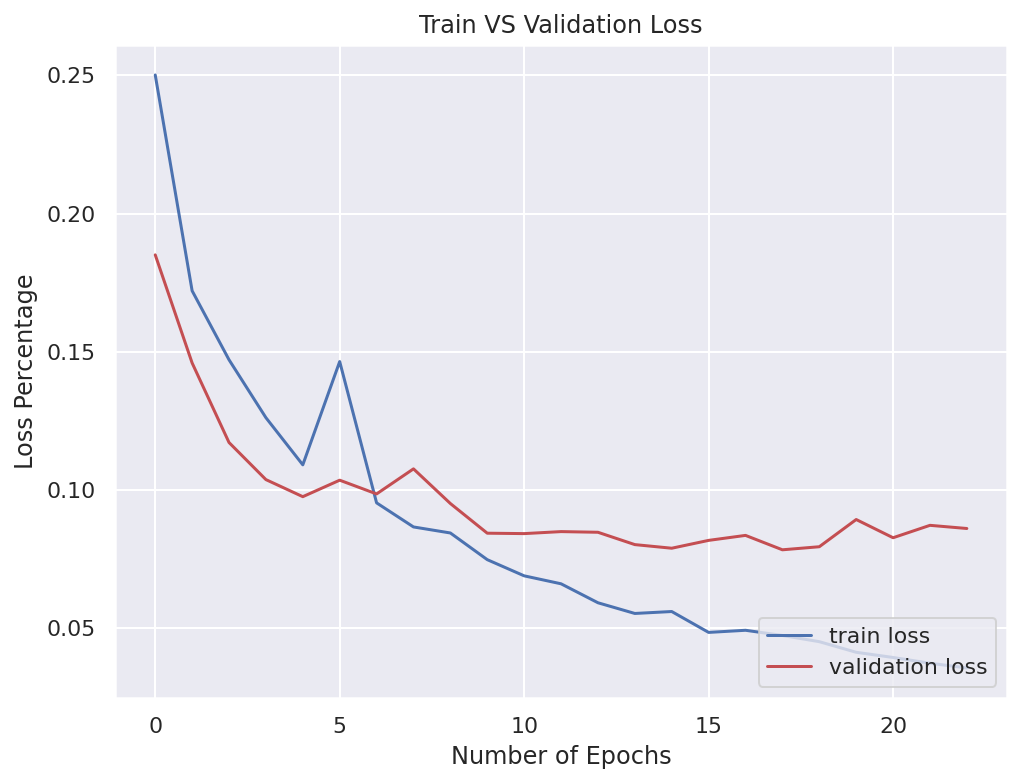

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history_gensim.history['loss'],c='b',label='train loss')
plt.plot(history_gensim.history['val_loss'],c='r',label='validation loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss Percentage')
plt.title('Train VS Validation Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model_gensim.evaluate(X_test_pad, y_test) 

115/115 [==============================] - 3s 21ms/step - loss: 0.0861 - accuracy: 0.9750


[0.0860564187169075, 0.9749864339828491]

In [ ]:
model.evaluate(X_test_pad, y_test)

115/115 [==============================] - 2s 20ms/step - loss: 0.1166 - accuracy: 0.9706


[0.1166185513138771, 0.9706361889839172]

In [ ]:
y_pred = np.where(model.predict(X_test_pad)>.5,1,0)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3139
           1       0.91      0.89      0.90       539

    accuracy                           0.97      3678
   macro avg       0.94      0.94      0.94      3678
weighted avg       0.97      0.97      0.97      3678



In [ ]:
from sklearn.metrics import confusion_matrix
cmlstm1 = confusion_matrix(y_test , y_pred)


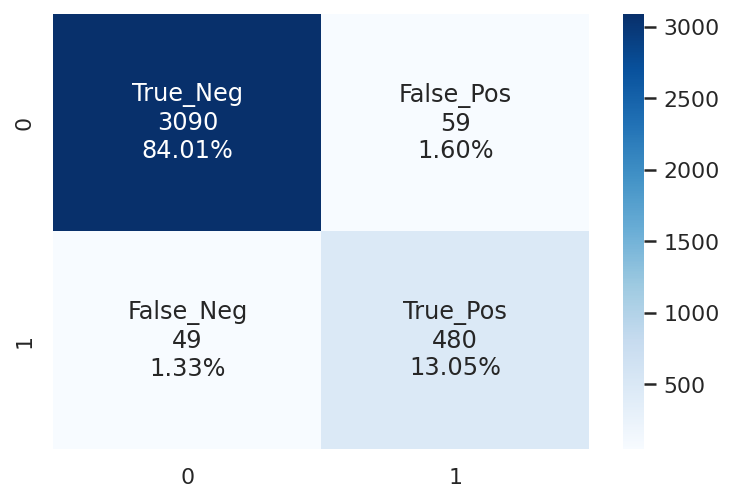

In [ ]:
cm=cmlstm1
group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
y_pred_gensim = np.where(model_gensim.predict(X_test_pad)>0.5,1,0)
print(metrics.classification_report(y_pred_gensim, y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3161
           1       0.90      0.92      0.91       517

    accuracy                           0.97      3678
   macro avg       0.94      0.95      0.95      3678
weighted avg       0.98      0.97      0.98      3678



In [ ]:
cmlstm2 = confusion_matrix(y_test , y_pred_gensim)

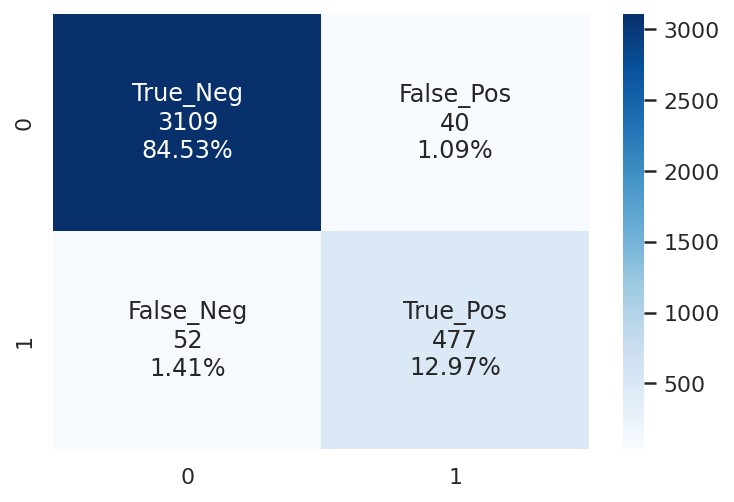

In [ ]:
cm=cmlstm2
group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
def predict(sentence):
    sentence_lst=[]
    sentence_lst.append(sentence)
    sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
    sentence_padded=pad_sequences(sentence_seq,maxlen=171,padding='post')
    probability = (model_gensim.predict(sentence_padded))[0][0]
    
    if probability > 0.5:
        print(f'Sensitive | {np.round(probability*100,2)}%')
    else:
        print(f'Non Sensitive | {100 - (np.round(probability*100,2))}%')

In [ ]:

predict(str(input('Input the sentence : ')))

Input the sentence : name first candidate
Sensitive | 98.96%


In [ ]:
df[df['Label']==0]

,Unnamed: 0,Data,Label,Separated,Text_Split,word_length
0,1,$candidates.candidateId,0,candidates.candidate.id,candidates candidate id,3
2,3,$candidates.teaId,0,candidates.tea.id,candidates tea id,3
3,4,$candidates.title,0,candidates.title,candidates title,2
8,9,$candidates.civility,0,candidates.civility,candidates civility,2
9,10,$candidates.maritalStatus,0,candidates.marital.status,candidates marital status,3
...,...,...,...,...,...,...
18378,18379,$paymentMethods.ach.accountType,0,payment.methods.ach.account.type,payment methods ach account type,5
18379,18380,$paymentMethods.ach.routingNumber,0,payment.methods.ach.routing.number,payment methods ach routing number,5
18380,18381,$paymentMethods.ach.accountNumber,0,payment.methods.ach.account.number,payment methods ach account number,5
18389,18390,$hp,0,hp,hp,1
